In [ ]:
import pandas as pd
import re
import string
from nltk.util import ngrams
from collections import Counter
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


sumber: https://www.kaggle.com/boldy717/textual-data-exploration-with-n-grams

In [ ]:
def cleaningtweets(tweets):
    cleanedtweets = []
    for tweet in tweets:
        text = tweet.lower()
        text = re.sub('@[a-zA-Z0-9_]', '', text)
        text = re.sub('#\w+','',text)
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('https?://\S+|www\.\S+', '', text)
        text = re.sub('<.*?>+', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\n', '', text)
        text = re.sub('\w*\d\w*', '', text)
        text = re.sub('\d+', '', text)
        text = re.sub("\s+"," ",text).strip()
        tokens = [token for token in text.split(" ") if token != ""]
        #tokens = [word for word in tokens if word not in stopwords.words('indonesian')]
        tweets = ' '.join(tokens)
        cleanedtweets.append(tweets)
    return(cleanedtweets)

def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

def plotNgrams(documents):
    unigrams = documentNgrams(documents, 4)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (28, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Quagrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

def textTrends(documents):
    cleanedtweets = cleaningtweets(documents)
    plotNgrams(cleanedtweets)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/VaksinCov/train sars-cov-2 tw.csv')
df.head()

,tweet,sentiment,Unnamed: 2
0,@Namaku_Mei Secara pribadi saya mengakui mayor...,pos,NaN
1,Tangan Dokter yang Suntik Vaksin Covid-19 ke P...,netral,NaN
2,"Bakal Disuntik Vaksin Covid Perdana di Batam, ...",netral,NaN
3,@bebesushi @kopiganja Nope. Vitamin tdk berpen...,netral,NaN
4,@TrinityTraveler Padahal upaya untuk mencapai ...,neg,NaN


In [ ]:
df = df.drop('Unnamed: 2', axis=1)
df.head()

,tweet,sentiment
0,@Namaku_Mei Secara pribadi saya mengakui mayor...,pos
1,Tangan Dokter yang Suntik Vaksin Covid-19 ke P...,netral
2,"Bakal Disuntik Vaksin Covid Perdana di Batam, ...",netral
3,@bebesushi @kopiganja Nope. Vitamin tdk berpen...,netral
4,@TrinityTraveler Padahal upaya untuk mencapai ...,neg


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3793 entries, 0 to 3797
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      3793 non-null   object
 1   sentiment  3793 non-null   object
dtypes: object(2)
memory usage: 88.9+ KB


In [ ]:
postw = df[df['sentiment'] == 'pos']
negtw = df[df['sentiment'] == 'neg']
nettw = df[df['sentiment'] == 'netral']

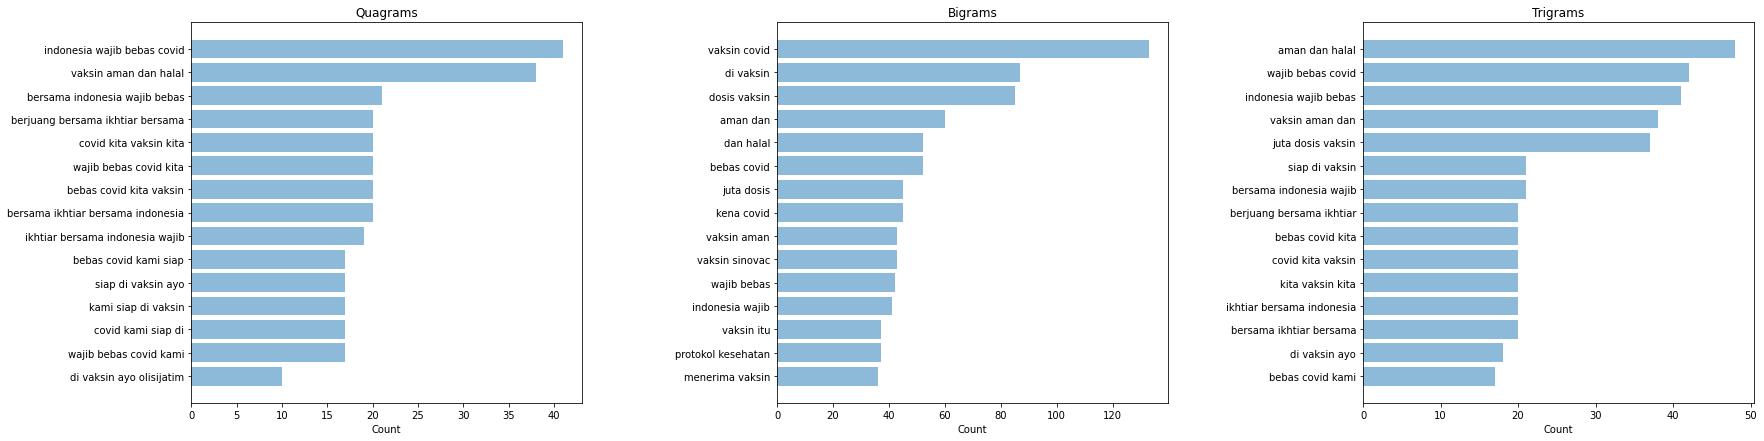

In [ ]:
textTrends(postw['tweet'])

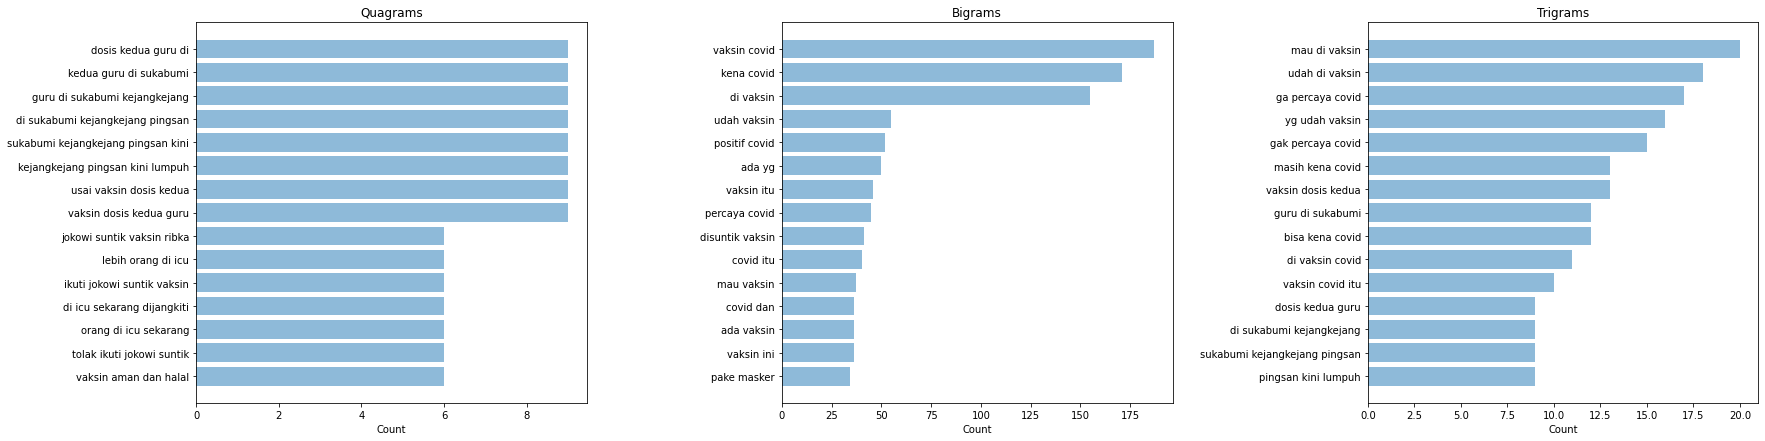

In [ ]:
textTrends(negtw['tweet'])

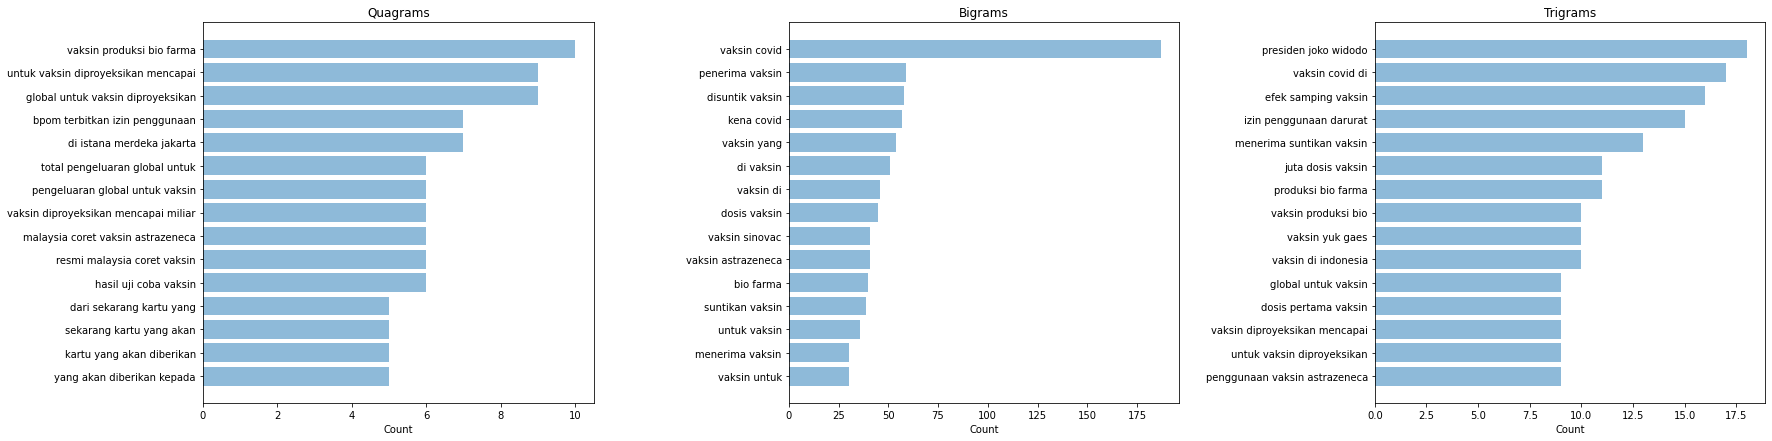

In [ ]:
textTrends(nettw['tweet'])